# **<span style="color: #ffd33d">   ★ BIKE SHARING DEMAND 분석 역량 강화 프로젝트 ★</span>**
<br>
<hr/>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno

import warnings


* 경고를 무시해주는 옵션

In [2]:
warnings.filterwarnings(action='ignore')


* 그래프를 자연스럽게 출력해주는 옵션

In [3]:
%matplotlib inline

* 파일 경로 설정

In [4]:
TRAIN_FILE_PATH = 'data/train.csv'
df = pd.read_csv(TRAIN_FILE_PATH, parse_dates=['datetime'])

* 데이터 프레임 타입 체크

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


#### 결측치 확인
 * 결측치 없음



In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 결측치 유무 여부 시각화
* 결측치 없음

<AxesSubplot:>

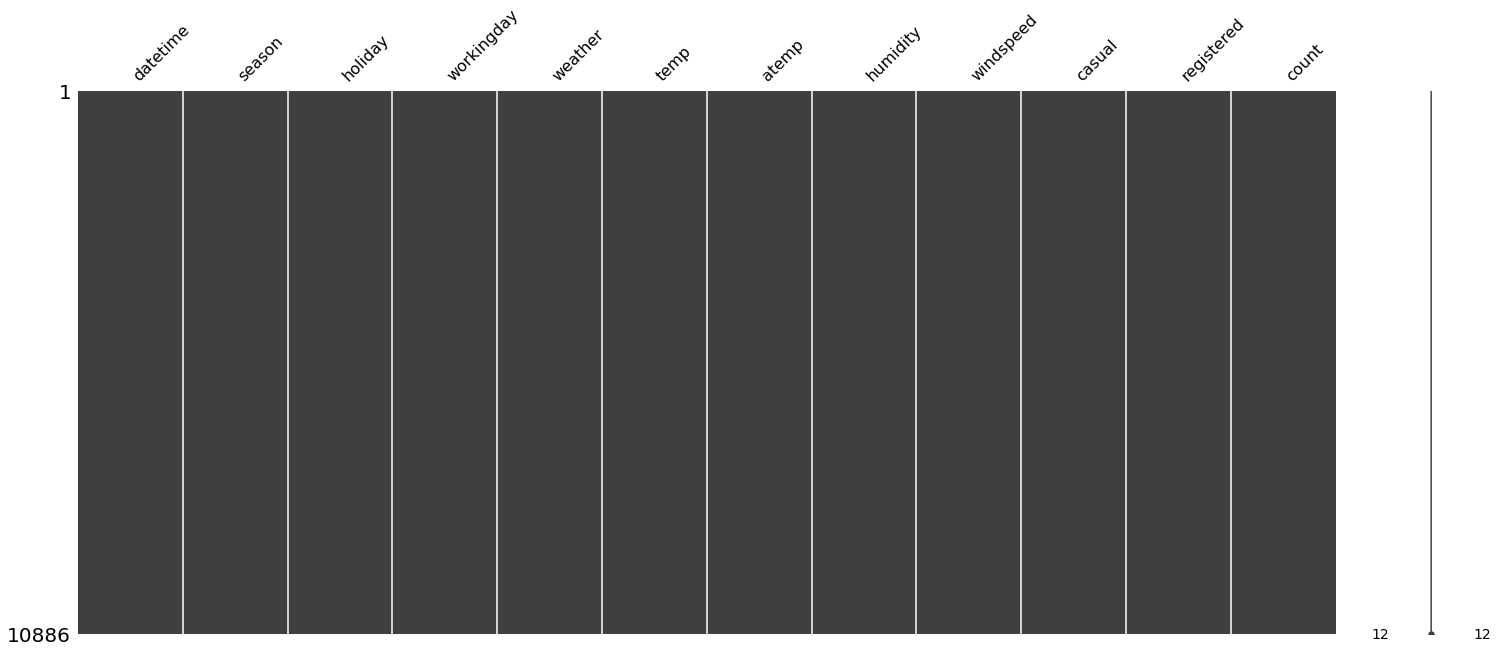

In [7]:
msno.matrix(df=df)

* 요일 데이터 세분화

In [8]:

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

### **시간 데이터 막대 그래프**

1. **분석목적**
    * 시간 데이터에 따른 대여량이 어떤 관계를 가지고 있는지 궁금하기 때문에 제일 먼저 시각화 하였음.

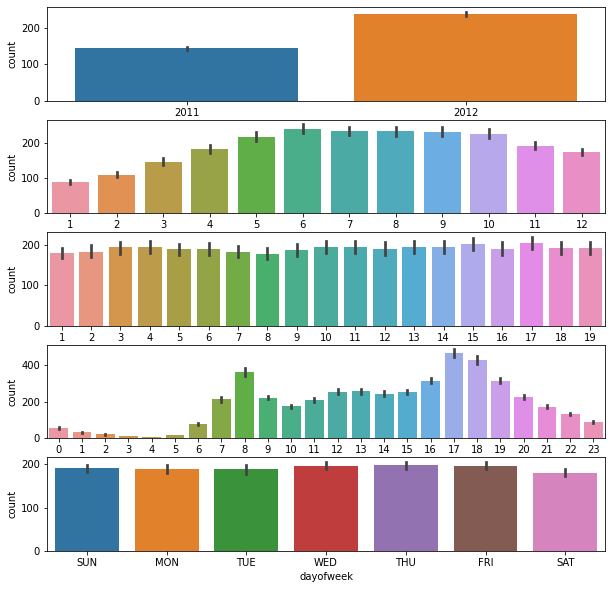

In [9]:
f, ax = plt.subplots(nrows=5, figsize=(10,10))
sns.barplot(data=df, x='year', y='count', ax=ax[0])
sns.barplot(data=df, x='month', y='count', ax=ax[1])
sns.barplot(data=df, x='day', y='count', ax=ax[2])
sns.barplot(data=df, x='hour', y='count', ax=ax[3])
sns.barplot(data=df, x='dayofweek', y='count', ax=ax[4])
ax[4].set_xticklabels(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])
plt.show()

2. **분석결과**
    * 2011년보다 2012년에 대여량이 증가하였음. (2011년보다 2012년에 홍보가 더 되었거나 단골 손님 유지 등의 이유가 있다고 생각함.)
    <br><br>
    * 추운 봄 겨울 보다는 따뜻한 여름 가을에 대여량이 더 많음.(워싱턴 DC의 날씨 정보 확인 결과, 11, 12, 1, 2, 3월이 추운 날씨)
    <br><br>
    * 출/퇴근 시간인 8시, 17~18시에 대여량이 가장 많았음.
    <br><br>
    * 일간 데이터는 거의 모든 날짜에 균일한 분포를 보였고 19일까지 밖에 데이터가 없기 때문에 <span style='color: RED'>**일간 데이터는 예측에 효과적인 데이터가 아님을 판단하고 삭제 결정**</span>
    <br><br>
    * 주간 데이터도 일간 데이터와 거의 균일한 모습을 보이고 있어 <span style='color: RED'>**유용한 데이터가 아님을 판단하고 삭제**</span>

In [10]:
df.drop(['day', 'dayofweek'], axis=1, inplace=True)

### **계절, 명절, 평일/주말에 시간 별 대여량 그래프**

1. **분석목적**
    * 각 특징 별 시간의 흐름에 따른 자전거 대여량 수의 차이가 궁금하여 포인트 플롯을 사용하여 시각화 하였음.

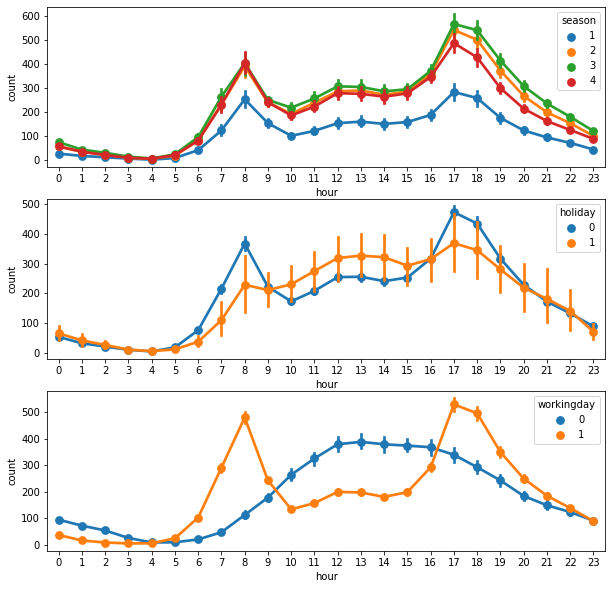

In [11]:
f, ax = plt.subplots(nrows=3, figsize=(10,10))
sns.pointplot(data=df, y='count', x='hour', hue='season', ax=ax[0])
sns.pointplot(data=df, y='count', x='hour', hue='holiday', ax=ax[1])
sns.pointplot(data=df, y='count', x='hour', hue='workingday', ax=ax[2])
plt.show()

2. **분석결과**
    * 계절별 데이터 확인 결과 봄의 대여량이 가장 적고 여름, 가을, 겨울의 대여량은 큰 차이는 없지만 겨울이 제일 적었음.
    <br><br>
    * 공휴일과 평일 주말 데이터의 분포는 거의 비슷하지만 공휴일 데이터에서 출퇴근 시간에 약간 대여량이 늘어나는 모습을 보임 (공휴일에 출퇴근하는 사람이 있거나 쉬는 공휴일과 노는 공휴일이 나누어져 있지 않다고 생각함.)
    <br><br>
    * 주말과 공휴일은 비슷하나 약간의 다른 분포를 보이므로 공휴일 'workingday' 컬럼에 숫자 값 2로 저장한 뒤 <span style = 'color : RED'>**One-Hot-Encoding을 사용하여 분류**</span>하는 방법을 사용하기로 결정.

In [12]:
holi_index = list(df[df['holiday']==1].index)

for i in range(len(holi_index)):
    df.loc[holi_index[i], 'workingday'] = 2

df.drop('holiday', axis=1, inplace=True)

df[df['workingday']==2]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
372,2011-01-17 00:00:00,1,2,2,8.20,9.850,47,15.0013,1,16,17,2011,1,0
373,2011-01-17 01:00:00,1,2,2,8.20,9.850,44,12.9980,1,15,16,2011,1,1
374,2011-01-17 02:00:00,1,2,2,7.38,8.335,43,16.9979,0,8,8,2011,1,2
375,2011-01-17 03:00:00,1,2,2,7.38,9.090,43,12.9980,0,2,2,2011,1,3
376,2011-01-17 04:00:00,1,2,2,7.38,9.850,43,8.9981,1,2,3,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,2012-11-12 19:00:00,4,2,1,22.14,25.760,73,19.0012,30,323,353,2012,11,19
10258,2012-11-12 20:00:00,4,2,2,21.32,25.000,77,19.0012,31,273,304,2012,11,20
10259,2012-11-12 21:00:00,4,2,3,22.14,25.760,73,15.0013,10,145,155,2012,11,21
10260,2012-11-12 22:00:00,4,2,1,21.32,25.000,77,16.9979,12,100,112,2012,11,22


* 공휴일 데이터를 'workingday' 컬럼에 2로 저장후 'holiday' 컬럼은 삭제

<br><br>
<hr/>

### **상관계수 확인을 위한 히트맵 그래프**
1. **분석목적**
    * 각 변수 별 상관 계수를 확인하고 다중 공선성이 의심되는 변수를 확인하기 위해 히트맵 그래프를 그렸음.

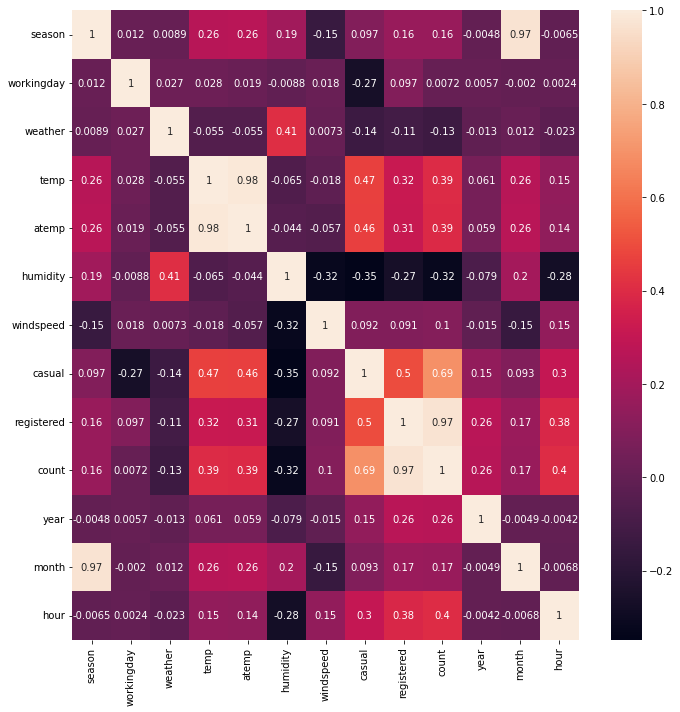

In [13]:
f = plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)
plt.tight_layout()
plt.show()

2. **분석결과**
    * temp와 atemp / registered 와 count / season 과 month 가 높은 상관 관계를 보임 (다중공선성으로 의심)
    <br><br>
    * registered 와 count는 타겟 변수(y) 이므로 제외
    <br><br>
    * VIF는 보통 10을 기준으로 다중공선성을 판단함
    <br><br>
    * 10이 넘기 때문에 <span style="color: RED">**다중공선성**</span>으로 판단

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_col = ['season', 'temp', 'atemp', 'month']

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df[X_col], i) for i in range(df[X_col].shape[1])]
vif['feateres'] = df[X_col].columns
vif

,VIF Factor,feateres
0,86.558560,season
1,244.435192,temp
2,259.819625,atemp
3,71.657048,month


### **해결방법**
 1. 정규화
 2. 해당 특징 삭제
<br><br>
 <hr/>

#### **정규화**
* sklearn의 **MinMaxscaler**는 데이터 프레임 형식이 아닌 <br>numpy 배열 형식을 반환하기 때문에 **MinMaxscaler**를 함수로 구현
<br><br>
* 공식
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;![minmaxscale](png/minmax.PNG)

In [15]:
def MMscaler(df, columnsList):
    mms_df = df.copy()
    for name in columnsList:
        max = df[name].max()
        min = df[name].min()
        for i in range(df.shape[0]):
            mms_df.loc[i, name] = (df.loc[i, name] - min) / (max - min)

    return mms_df

* 해결방법 1을 진행 (정규화)
* season과 month는 범주형 데이터이기 때문에 정규화 대상에서 제외함.
<br><br>
* **정규화 후 VIF**

In [16]:
multicol = ['temp', 'atemp']
df_n = MMscaler(df, multicol)

vif_n = pd.DataFrame()
vif_n['VIF Factor'] = [variance_inflation_factor(df_n[X_col], i) for i in range(df_n[X_col].shape[1])]
vif_n['feateres'] = df_n[X_col].columns
vif_n

,VIF Factor,feateres
0,86.062461,season
1,224.015624,temp
2,240.300949,atemp
3,71.498267,month


* VIF는 줄어들진 않았지만 시각화로 다중공선성을 다시 판단하기 위해 산점도 행렬을 시각화함.
<br><br>
* 선형 관계를 명확히 확인할 수 있으므로 다중공선성으로 판정.
* <span style='color: YELLOW'>정규화는 다중공선성 문제를 해결할 수 없었음.</span>

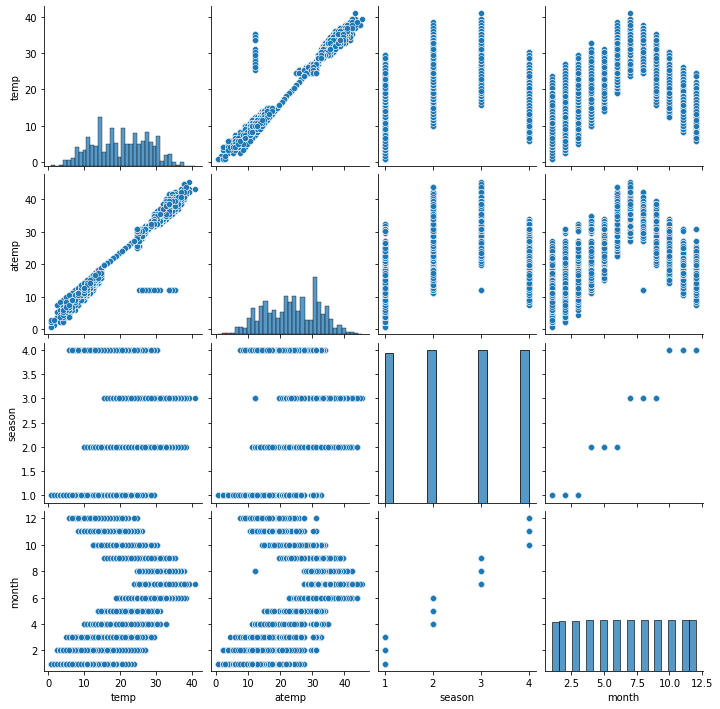

In [17]:
sns.pairplot(df[['temp', 'atemp', 'season', 'month']], diag_kind='hist')

#### 특징 삭제
* 정규화로 다중공선성 문제를 해결할 수 없었으므로 해당 특징 삭제를 결정
<br><br>
* <span style = 'color: RED'>**VIF가 더 높았던 'atemp'와 'season'을 삭제**</span>

In [18]:
df_n.drop(['atemp', 'season'], axis=1, inplace=True)

<hr/>

### 독립변수 중 양적변수의 산점도 그래프 확인
<br>

1. **분석목적**
    * 연속형 데이터와 'count' 간의 데이터 분포를 보기 위하여 산점도 그래프를 그려보았음.

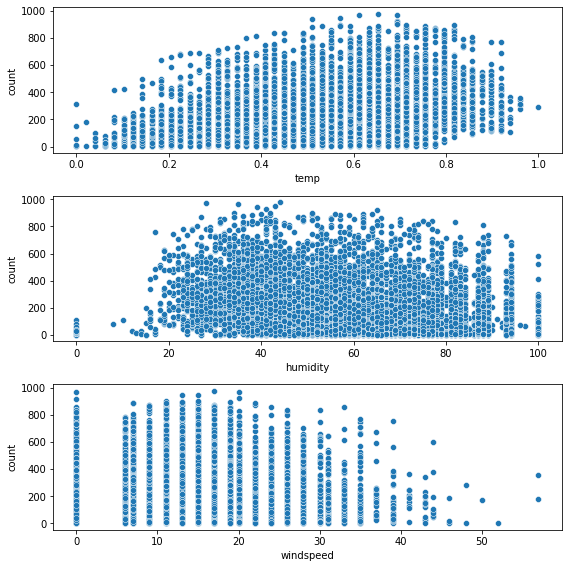

In [19]:
f, ax = plt.subplots(nrows=3, figsize=(8,8))
sns.scatterplot(data=df_n, x='temp', y='count',ax=ax[0])
sns.scatterplot(data=df_n, x='humidity', y='count',ax=ax[1])
sns.scatterplot(data=df_n, x='windspeed', y='count',ax=ax[2])
plt.tight_layout()
plt.show()

2. **분석결과**
    * <span style = "color : RED">**습도에 0과 100 데이터가 섞여있고 풍속에도 0에 데이터가 많이 몰려있음을 보고 의문점을 가지게 됨.**</span>
    <br><br>
3. **해결방안 구상**
    * 일단 데이터를 뽑아 확인
    <br><br>
    * 2011년 3월 10일의 데이터만 0값을 가지고 있음. (이 날 하루 측정 기기의 결함이 있어나 측정자의 휴가 등으로 측정을 안한 값을 0으로 입력했다고 생각)

In [20]:
df[df['humidity']==0]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
1091,2011-03-10 00:00:00,1,1,3,13.94,15.910,0,16.9979,3,0,3,2011,3,0
1092,2011-03-10 01:00:00,1,1,3,13.94,15.910,0,16.9979,0,2,2,2011,3,1
1093,2011-03-10 02:00:00,1,1,3,13.94,15.910,0,16.9979,0,1,1,2011,3,2
1094,2011-03-10 05:00:00,1,1,3,14.76,17.425,0,12.9980,1,2,3,2011,3,5
1095,2011-03-10 06:00:00,1,1,3,14.76,16.665,0,22.0028,0,12,12,2011,3,6
1096,2011-03-10 07:00:00,1,1,3,15.58,19.695,0,15.0013,1,36,37,2011,3,7
1097,2011-03-10 08:00:00,1,1,3,15.58,19.695,0,19.0012,1,43,44,2011,3,8
1098,2011-03-10 09:00:00,1,1,3,16.40,20.455,0,15.0013,1,23,24,2011,3,9
1099,2011-03-10 10:00:00,1,1,3,16.40,20.455,0,11.0014,0,17,17,2011,3,10
1100,2011-03-10 11:00:00,1,1,3,16.40,20.455,0,16.9979,6,5,11,2011,3,11


* 습도의 100값 파악

In [21]:
df[df['humidity']==100]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
26,2011-01-02 02:00:00,1,0,2,17.22,21.210,100,19.0012,1,8,9,2011,1,2
464,2011-02-02 10:00:00,1,1,2,9.02,13.635,100,0.0000,2,59,61,2011,2,10
529,2011-02-05 05:00:00,1,0,3,8.20,11.365,100,6.0032,0,9,9,2011,2,5
530,2011-02-05 06:00:00,1,0,3,8.20,12.880,100,0.0000,0,4,4,2011,2,6
532,2011-02-05 08:00:00,1,0,3,8.20,11.365,100,6.0032,0,10,10,2011,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10654,2012-12-10 08:00:00,4,1,2,17.22,21.210,100,16.9979,9,575,584,2012,12,8
10655,2012-12-10 09:00:00,4,1,2,17.22,21.210,100,15.0013,11,273,284,2012,12,9
10658,2012-12-10 12:00:00,4,1,3,18.04,21.970,100,15.0013,23,150,173,2012,12,12
10659,2012-12-10 13:00:00,4,1,3,18.04,21.970,100,15.0013,30,190,220,2012,12,13


* 습도가 100인 값의 인덱스를 하나 선정하여 주변 값을 확인결과 93 > 100 자연스럽게 상승하는 것을 보아 100값은 이상이 없다 판단.

In [22]:
df[527:534]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
527,2011-02-05 03:00:00,1,0,2,9.84,12.120,75,11.0014,1,10,11,2011,2,3
528,2011-02-05 04:00:00,1,0,3,9.02,11.365,93,8.9981,0,8,8,2011,2,4
529,2011-02-05 05:00:00,1,0,3,8.20,11.365,100,6.0032,0,9,9,2011,2,5
530,2011-02-05 06:00:00,1,0,3,8.20,12.880,100,0.0000,0,4,4,2011,2,6
531,2011-02-05 07:00:00,1,0,3,9.02,12.880,93,6.0032,0,4,4,2011,2,7
532,2011-02-05 08:00:00,1,0,3,8.20,11.365,100,6.0032,0,10,10,2011,2,8
533,2011-02-05 09:00:00,1,0,3,8.20,11.365,100,6.0032,3,17,20,2011,2,9


* 습도의 100값은 이상치가 아닌 반면 0값은 이상치로 다른 값을 대치해주거나 삭제해주어야함.
<br><br>
* 습도의 0값 예측 예정
<br><br>
<hr/>
<br><br>


* 풍속의 0값 확인

In [23]:
df[df['windspeed']==0]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,12
10829,2012-12-17 15:00:00,4,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,15
10846,2012-12-18 08:00:00,4,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,8
10860,2012-12-18 22:00:00,4,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,22


* 풍속의 0값은 무수히 많음
<br><br>
* 인덱스를 한개 뽑아 전후값 확인

In [121]:
df[85:95]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
85,2011-01-04 17:00:00,1,1,1,11.48,13.635,48,15.0013,10,202,212,2011,1,17
86,2011-01-04 18:00:00,1,1,1,10.66,12.880,48,12.9980,3,179,182,2011,1,18
87,2011-01-04 19:00:00,1,1,1,9.84,12.880,48,7.0015,2,110,112,2011,1,19
88,2011-01-04 20:00:00,1,1,1,9.84,12.880,48,7.0015,1,53,54,2011,1,20
89,2011-01-04 21:00:00,1,1,1,9.02,13.635,64,0.0000,0,48,48,2011,1,21
90,2011-01-04 22:00:00,1,1,1,9.02,12.880,64,6.0032,1,34,35,2011,1,22
91,2011-01-04 23:00:00,1,1,1,8.20,11.365,69,6.0032,2,9,11,2011,1,23
92,2011-01-05 00:00:00,1,1,1,8.20,12.880,64,0.0000,0,6,6,2011,1,0
93,2011-01-05 01:00:00,1,1,1,6.56,9.850,74,6.0032,0,6,6,2011,1,1
94,2011-01-05 02:00:00,1,1,1,6.56,9.850,74,6.0032,0,2,2,2011,1,2


* <span style = 'color: RED'> **풍속이 갑자기 훅 0으로 떨어지는 것은 적절하지 않다고 판단.** <span/>
<br><br>
* 0값을 이상치로 보고 예측

* 데이터 준비 과정

In [25]:
wind_zeros = df_n[df_n['windspeed'] == 0]
hu_zeros = df_n[df_n['humidity']==0]

wX_train = df_n.drop(wind_zeros.index, axis=0)
wX_train = wX_train.drop(hu_zeros.index, axis=0)

wy_train = pd.DataFrame(wX_train['windspeed'], columns=['windspeed'])

wX_train = wX_train.drop('windspeed', axis=1)


In [26]:
wX_train = wX_train.drop(['datetime', 'workingday', 'casual', 'registered', 'count'], axis=1)

In [27]:
wX_train.head()

,weather,temp,humidity,year,month,hour
5,2,0.224490,75,2011,1,5
10,1,0.367347,76,2011,1,10
11,1,0.346939,81,2011,1,11
12,1,0.408163,77,2011,1,12
13,2,0.448980,72,2011,1,13


In [28]:
wy_train.head()

,windspeed
5,6.0032
10,16.9979
11,19.0012
12,19.0012
13,19.9995


In [29]:
wpre_X = wind_zeros.drop('windspeed', axis=1)
wpre_X.drop(['datetime', 'workingday', 'casual', 'registered', 'count'], axis=1, inplace=True)
wpre_X.head()

,weather,temp,humidity,year,month,hour
0,1,0.224490,81,2011,1,0
1,1,0.204082,80,2011,1,1
2,1,0.204082,80,2011,1,2
3,1,0.224490,75,2011,1,3
4,1,0.224490,75,2011,1,4


* 앙상블 모델인 에이다부스트 모델과 랜덤 포레스트 모델을 사용하고 그리드 서치를 통하여 정확도가 가장 높은 모델을 사용 예정
<br><br>
* 에이다부스트 모델
    * 에이다부스트 모델은 여러개의 스텀프를 활용하여 예측하는 모델임.
    <br><br>
    ![minmaxscale](png/스텀프.PNG)
    * 스텀프란 이렇게 루트노드와 자식노드 두개로 이루어진 얕은 트리임.
    <br><br>
    * 즉, 이러한 스텀프들은 좋지 못한 성능을 보이고 weak learner 라고 부름.
    <br><br>
    * 스텀프를 계속 생성하여주면서 틀린 데이터의 가중치를 더 높게 설정해주면서 전에 틀렸던 데이터를 더 잘 예측하는 스텀프를 만들게함.
    <br><br>
    * 최종적으로 예측할 때 더 성능의 높은 결정에 따름
    <br><br>
    * 즉, weak learner 들을 모아 strong learner를 만드는 모델임.
    <br><br>



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [31]:
ada_model = AdaBoostRegressor()

ada_param = {
    'n_estimators': [10, 50, 100, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 1.0]
}

ada_gsc = GridSearchCV(ada_model, param_grid=ada_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ada_gsc.fit(wX_train, wy_train.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [10, 50, 100, 300]},
             scoring='neg_mean_squared_error')

In [32]:
print('베스트 하이퍼 파라미터: {0}'.format(ada_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * ada_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.01, 'n_estimators': 50}
베스트 하이퍼 파라미터 일 때 rmse: 6.58


* 랜덤포레스트 모델
    * 훈련을 통해 무작위로 구성해놓은 트리의 모임으로부터 분류 결과를 취합해서 얻는 앙상블 모델이다. (인기투표와 유사)
    
    >>-무작위(Random) 트리의 모임(숲-Forest)
    <br><br>
    * 무작위로 트리의 모임을 구성하여 예측하기 때문에 과적합을 피할 수 있다.
    <br><br>
    * 무작위로 특징을 뽑아 트리를 만들때 중복을 허용하기 때문에 단일 데이터가 여러번 선택될 수도 있다. - bagging 기법

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_model = RandomForestRegressor()

rf_param = {
    'max_depth' : [3, 4, 5], 
    'n_estimators': [50, 100, 150, 300, 500]
}

rf_gsc = GridSearchCV(rf_model, param_grid=rf_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rf_gsc.fit(wX_train, wy_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 300, 500]},
             scoring='neg_mean_squared_error')

In [35]:
print('베스트 하이퍼 파라미터: {0}'.format(rf_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * rf_gsc.best_score_)))

베스트 하이퍼 파라미터: {'max_depth': 4, 'n_estimators': 150}
베스트 하이퍼 파라미터 일 때 rmse: 6.55


* 그래디언트 부스팅 모델
    * 에이다부스트 모델과 같은 부스팅 계열의 모델임.
    <br><br>
    * 다만 가중치의 업데이트 방식이 경사 하강법을 사용한다는 것이 차이.
    <br><br>
    * Greedy Algorithm 를 기반으로 작동하기 때문에 과적합 되기 쉽다는 단점이 있음.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gb_model = GradientBoostingRegressor()

gb_param = [{
   'n_estimators': [10, 50, 100],
   'max_depth': [3, 4, 5],
   'learning_rate': [0.01, 0.1, 0.3]
}]

gb_gsc = GridSearchCV(gb_model, param_grid=gb_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gb_gsc.fit(wX_train, wy_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1, 0.3],
                          'max_depth': [3, 4, 5],
                          'n_estimators': [10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [38]:
print('베스트 하이퍼 파라미터: {0}'.format(gb_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * gb_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 10}
베스트 하이퍼 파라미터 일 때 rmse: 6.64


* Best Model은 max_depth = 4, n_estimators = 300 일때의 RandomForest 모델이 선정되었음.
<br><br>
* <span style = 'color : red'>**Best Model을 기반으로 예측 시작**</span>

In [39]:
wbest_model = RandomForestRegressor(max_depth=4, n_estimators=300)
wbest_model.fit(wX_train, wy_train)
wpre_y = wbest_model.predict(wpre_X)


In [40]:
index_wzeros = list(wind_zeros.index)

for i in range(len(index_wzeros)):
    df_n.loc[index_wzeros[i], 'windspeed'] = wpre_y[i]

* 풍속의 0값이 앞부분에 많이 있었는데 자연스럽게 채워졌다.

In [41]:
df_n.head(20)

,datetime,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,0,1,0.224490,81,10.759666,3,13,16,2011,1,0
1,2011-01-01 01:00:00,0,1,0.204082,80,10.759666,8,32,40,2011,1,1
2,2011-01-01 02:00:00,0,1,0.204082,80,10.759666,5,27,32,2011,1,2
3,2011-01-01 03:00:00,0,1,0.224490,75,11.029600,3,10,13,2011,1,3
4,2011-01-01 04:00:00,0,1,0.224490,75,11.029600,0,1,1,2011,1,4
5,2011-01-01 05:00:00,0,2,0.224490,75,6.003200,0,1,1,2011,1,5
6,2011-01-01 06:00:00,0,1,0.204082,80,10.759666,2,0,2,2011,1,6
7,2011-01-01 07:00:00,0,1,0.183673,86,10.802568,1,2,3,2011,1,7
8,2011-01-01 08:00:00,0,1,0.224490,75,12.356535,1,7,8,2011,1,8
9,2011-01-01 09:00:00,0,1,0.306122,76,13.911222,8,6,14,2011,1,9


* 풍속을 예측 완료하였으니 풍속에 비해 적었던 습도의 0 데이터를 예측 준비
<br><br>
* 습도 0값 데이터 확인
<br><br>
* 2011년 3월 10일의 데이터가 모두 0으로 되어있음.

In [42]:
hu_zeros = df_n[df_n['humidity']==0]
hu_zeros

,datetime,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour
1091,2011-03-10 00:00:00,1,3,0.326531,0,16.9979,3,0,3,2011,3,0
1092,2011-03-10 01:00:00,1,3,0.326531,0,16.9979,0,2,2,2011,3,1
1093,2011-03-10 02:00:00,1,3,0.326531,0,16.9979,0,1,1,2011,3,2
1094,2011-03-10 05:00:00,1,3,0.346939,0,12.9980,1,2,3,2011,3,5
1095,2011-03-10 06:00:00,1,3,0.346939,0,22.0028,0,12,12,2011,3,6
1096,2011-03-10 07:00:00,1,3,0.367347,0,15.0013,1,36,37,2011,3,7
1097,2011-03-10 08:00:00,1,3,0.367347,0,19.0012,1,43,44,2011,3,8
1098,2011-03-10 09:00:00,1,3,0.387755,0,15.0013,1,23,24,2011,3,9
1099,2011-03-10 10:00:00,1,3,0.387755,0,11.0014,0,17,17,2011,3,10
1100,2011-03-10 11:00:00,1,3,0.387755,0,16.9979,6,5,11,2011,3,11


* 습도 예측 데이터 준비

In [43]:
hX_train = df_n.drop(hu_zeros.index, axis=0)

hy_train = pd.DataFrame(hX_train['humidity'], columns=['humidity'])
hX_train.drop('humidity', axis=1, inplace=True)

* 습도 예측에 관련 없는 데이터는 모두 삭제

In [44]:
hX_train = hX_train.drop(['datetime', 'workingday', 'casual', 'registered', 'count'], axis=1)

In [45]:
hX_train.shape

(10864, 6)

In [46]:
hy_train.shape

(10864, 1)

In [47]:
hpre_X = hu_zeros.drop('windspeed', axis=1)
hpre_X.drop(['datetime', 'workingday', 'casual', 'registered', 'count'], axis=1, inplace=True)
hpre_X.head()

,weather,temp,humidity,year,month,hour
1091,3,0.326531,0,2011,3,0
1092,3,0.326531,0,2011,3,1
1093,3,0.326531,0,2011,3,2
1094,3,0.346939,0,2011,3,5
1095,3,0.346939,0,2011,3,6


* 예측 데이터 준비완료
<br><br>
* 풍속 예측과 마찬가지로 아다부스트, 랜덤포레스트, 그래디언트 부스팅의 그리드 서치 진행
<br><br>
* 한 번 진행했던 과정이므로 설명 생략

* 습도 아다 부스트 그리드 서치

In [48]:
hada_model = AdaBoostRegressor()

hada_param = {
    'n_estimators': [10, 50, 100, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 1.0]
}

hada_gsc = GridSearchCV(hada_model, param_grid=hada_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
hada_gsc.fit(hX_train, hy_train.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [10, 50, 100, 300]},
             scoring='neg_mean_squared_error')

In [49]:
print('베스트 하이퍼 파라미터: {0}'.format(hada_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * hada_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 1.0, 'n_estimators': 10}
베스트 하이퍼 파라미터 일 때 rmse: 14.37


* 습도 랜덤 포레스트 그리드 서치

In [50]:
hrf_model = RandomForestRegressor()

hrf_param = {
    'max_depth' : [7], 
    'n_estimators': [600, 700, 800]
}

hrf_gsc = GridSearchCV(hrf_model, param_grid=hrf_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
hrf_gsc.fit(hX_train, hy_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7], 'n_estimators': [600, 700, 800]},
             scoring='neg_mean_squared_error')

In [51]:
print('베스트 하이퍼 파라미터: {0}'.format(hrf_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * hrf_gsc.best_score_)))

베스트 하이퍼 파라미터: {'max_depth': 7, 'n_estimators': 600}
베스트 하이퍼 파라미터 일 때 rmse: 13.79


* 습도 그래디언트 부스팅 그리드 서치

In [52]:
hgb_model = GradientBoostingRegressor()

hgb_param = [{
   'n_estimators': [40, 50, 60],
   'max_depth': [2, 3],
   'learning_rate': [0.1]
}]

hgb_gsc = GridSearchCV(hgb_model, param_grid=hgb_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
hgb_gsc.fit(hX_train, hy_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1], 'max_depth': [2, 3],
                          'n_estimators': [40, 50, 60]}],
             scoring='neg_mean_squared_error')

In [53]:
print('베스트 하이퍼 파라미터: {0}'.format(hgb_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * hgb_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
베스트 하이퍼 파라미터 일 때 rmse: 13.55


* Best Model 로 learning_rate = 0.1, max_depth = 3, n_estimators = 50 일때의 그래디언트 부스팅 모델이 선정되었음.

* <span style = 'color : RED'>**Best Model로 습도 예측**</span>

In [54]:
hbest_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50)
hbest_model.fit(hX_train, hy_train)
hpre_y = hbest_model.predict(hpre_X)

In [55]:
index_hzeros = list(hu_zeros.index)

for i in range(len(index_hzeros)):
    df_n.loc[index_hzeros[i], 'humidity'] = hpre_y[i]

* 비어있던 3월 10일의 습도 데이터를 모두 채워주었음

In [56]:
df_n[1091:1112]

,datetime,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour
1091,2011-03-10 00:00:00,1,3,0.326531,84.609507,16.9979,3,0,3,2011,3,0
1092,2011-03-10 01:00:00,1,3,0.326531,84.609507,16.9979,0,2,2,2011,3,1
1093,2011-03-10 02:00:00,1,3,0.326531,84.853349,16.9979,0,1,1,2011,3,2
1094,2011-03-10 05:00:00,1,3,0.346939,85.730696,12.9980,1,2,3,2011,3,5
1095,2011-03-10 06:00:00,1,3,0.346939,85.730696,22.0028,0,12,12,2011,3,6
1096,2011-03-10 07:00:00,1,3,0.367347,85.730696,15.0013,1,36,37,2011,3,7
1097,2011-03-10 08:00:00,1,3,0.367347,85.730696,19.0012,1,43,44,2011,3,8
1098,2011-03-10 09:00:00,1,3,0.387755,84.880149,15.0013,1,23,24,2011,3,9
1099,2011-03-10 10:00:00,1,3,0.387755,84.038468,11.0014,0,17,17,2011,3,10
1100,2011-03-10 11:00:00,1,3,0.387755,84.949218,16.9979,6,5,11,2011,3,11


<hr/>

#### 타겟변수의 분포 그래프 확인

1. 분석목적
    * 타겟변수 count, casual, registered 의 분포 형태를 확인하고 만약 정규 분포에 가깝지 않다면 로그 스케일을 씌워주어 정규분포에 가깝게 만들기 위함.
    <br><br>
    * 왜도와 첨도 값도 확인하여 분포의 형태도 확인하기 위함.

* 왜도와 첨도
    1. 왜도
        * 분포의 비대칭성을 나타내는 척도임.
        * 양수값을 보일때 분포의 중심은 왼쪽으로 치우쳐있고 음수일때 반대를 보임.
        * 보통 절대값이 3 미만일때 기준에 부합한다고 봄.
        <br><br>
    2. 첨도
        * 분포의 뾰족함을 나타내는 척도임.
        * 평균의 주변에 데이터가 많이 몰려있을 경우 큰 값을 보임
        * 보통 절대값이 7 미만일때 기준에 부합한다고 봄.

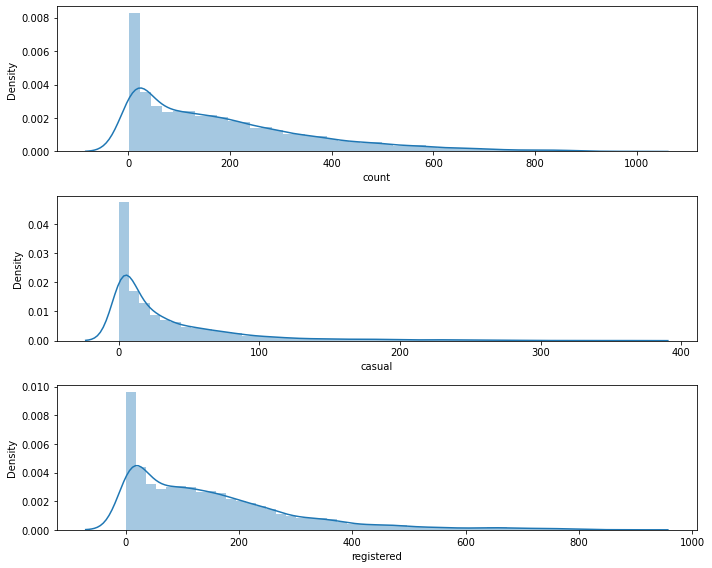

In [57]:
f, ax = plt.subplots(nrows=3, figsize=(10,8))
sns.distplot(df_n['count'], ax=ax[0])
sns.distplot(df_n['casual'], ax=ax[1])
sns.distplot(df_n['registered'], ax=ax[2])
plt.tight_layout()

In [58]:
print('count의 왜도: {}, 첨도: {}'.format(df_n['count'].skew(), df_n['count'].kurt()))
print('casual의 왜도: {}, 첨도: {}'.format(df_n['casual'].skew(), df_n['casual'].kurt()))
print('registered의 왜도: {}, 첨도: {}'.format(df_n['registered'].skew(), df_n['registered'].kurt()))

count의 왜도: 1.2420662117180776, 첨도: 1.3000929518398334
casual의 왜도: 2.4957483979812567, 첨도: 7.551629305632764
registered의 왜도: 1.5248045868182296, 첨도: 2.6260809999210672


2. 분석결과
    * 분포의 왜도와 첨도만을 봤을 때에는 casual을 제외하면 기준에 부합하는 것으로 보이지만 정규분포를 따르지 않음.
    <br><br>
    * casual과 registered의 분포가 다른 모습을 보여 예측 단계에서 타겟 변수를 사용하지 않고 casual과 registered의 데이터를 각각 예측 후 합쳐 사용하기로 결정
    <br><br>
3. 해결
    * 로그스케일을 진행

* 로그스케일
    * 로그 스케일이란 데이터에 로그를 취하는 것을 말함.
    <br><br>
    * 로그를 취하면 데이터간 편차를 줄여 왜도와 첨도를 줄이기 때문에 정규성을 높일 수 있음.
    <br><br>
    * 로그의 역할은 큰 수를 같은 비율의 작은 수로 바꾸어 주는 것임.

* 로그스케일 진행

In [59]:
df_n['log_count'] = np.log1p(df_n['count'])
df_n['log_casual'] = np.log1p(df_n['casual'])
df_n['log_registered'] = np.log1p(df_n['registered'])

* 로그스케일을 적용한 데이터의  분포를 확인
    * <span style = 'color : RED'>**눈으로 보기에도 많이 정규분포의 형태에 가까워짐.**</span>

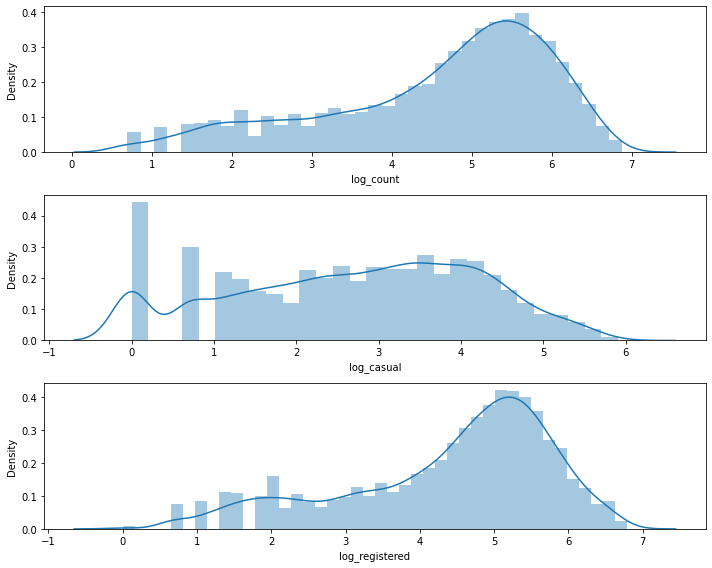

In [60]:
f, ax = plt.subplots(nrows=3, figsize=(10,8))
sns.distplot(df_n['log_count'], ax=ax[0])
sns.distplot(df_n['log_casual'], ax=ax[1])
sns.distplot(df_n['log_registered'], ax=ax[2])
plt.tight_layout()

* <span style = 'color : RED'>**첨도와 왜도도 0.xxx 퍼센트대로 많이 개선되었음**</span>

In [61]:
print('왜도: {}, 첨도: {}'.format(df_n['log_count'].skew(), df_n['log_count'].kurt()))  
print('왜도: {}, 첨도: {}'.format(df_n['log_casual'].skew(), df_n['log_casual'].kurt()))
print('왜도: {}, 첨도: {}'.format(df_n['log_registered'].skew(), df_n['log_registered'].kurt()))

왜도: -0.8514116321738531, 첨도: -0.11948257101776338
왜도: -0.22472252892408062, 첨도: -0.8696974993823288
왜도: -0.8555617565369439, 첨도: -0.06995275735124729


* Q-Q plot 을 그려 정규분포와 얼마나 비슷한 형태인지 확인.
<br><br>

* Q-Q plot 이란
    * 두개의 분포를 비교하여 얼마나 유사한지 시각화하는 그래프
    <br><br>
    * 데이터를 한개만 입력하면 정규분포와 얼마나 유사한지 시각화


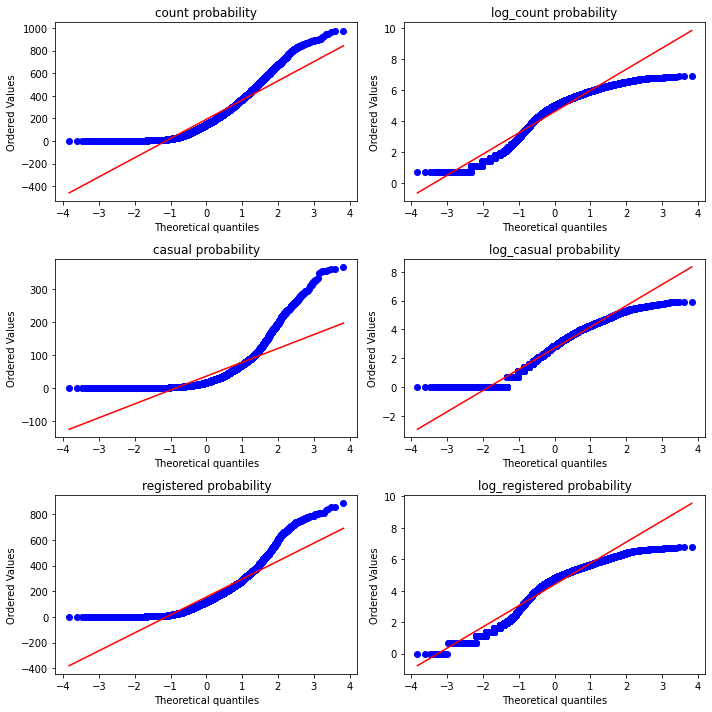

In [62]:
from scipy import stats

f = plt.figure(figsize=(10, 10))
ax1 = f.add_subplot(3, 2, 1)
res = stats.probplot(df_n['count'], plot=plt)
ax1.set_title('count probability')

ax2 = f.add_subplot(3, 2, 2)
res = stats.probplot(df_n['log_count'], plot=plt)
ax2.set_title('log_count probability')

ax3 = f.add_subplot(3, 2, 3)
res = stats.probplot(df_n['casual'], plot=plt)
ax3.set_title('casual probability')

ax4 = f.add_subplot(3, 2, 4)
res = stats.probplot(df_n['log_casual'], plot=plt)
ax4.set_title('log_casual probability')

ax5 = f.add_subplot(3, 2, 5)
res = stats.probplot(df_n['registered'], plot=plt)
ax5.set_title('registered probability')

ax6 = f.add_subplot(3, 2, 6)
res = stats.probplot(df_n['log_registered'], plot=plt)
ax6.set_title('log_registered probability')

plt.tight_layout()

* 왼쪽의 로그스케일링 전의 데이터와 비교하여 어느정도 굽어짐이 펴져 <span style = 'color : RED'>**조금 더 정규분포의 형태를 띄는것을 확인가능**</span>함.

* 나머지 연속형 변수의 분포 타겟변수와 같은 이유로 궁금하여 확인해보았음.

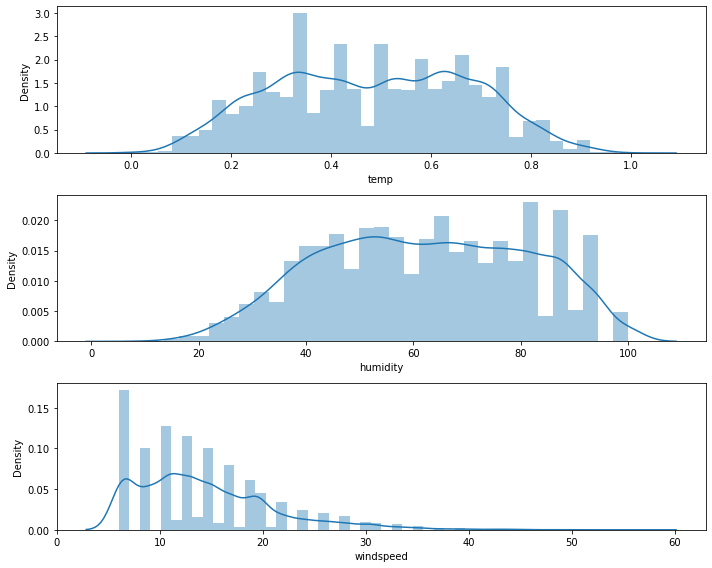

In [63]:
f, ax = plt.subplots(nrows=3, figsize=(10,8))
sns.distplot(df_n['temp'], ax=ax[0])
sns.distplot(df_n['humidity'], ax=ax[1])
sns.distplot(df_n['windspeed'], ax=ax[2])
plt.tight_layout()

* temp와 humidity는 정규분포와 거의 유사한 형태를 보이지만 windspeed는 그렇지 못함.
* 왜도와 첨도를 확인

In [64]:
print('왜도: {}, 첨도: {}'.format(df_n['temp'].skew(), df_n['temp'].kurt()))
print('왜도: {}, 첨도: {}'.format(df_n['humidity'].skew(), df_n['humidity'].kurt()))
print('왜도: {}, 첨도: {}'.format(df_n['windspeed'].skew(), df_n['windspeed'].kurt()))

왜도: 0.003690844422470916, 첨도: -0.9145302637630794
왜도: -0.04303806247181989, 첨도: -0.8941932270554456
왜도: 1.1722299528152276, 첨도: 1.8791959870886186


* windspeed의 왜도와 첨도는 기준에 부합하지만 약간 높은 모습을 보임
<br><br>
* Q-Q plot을 그려 정규분포와의 유사도 확인

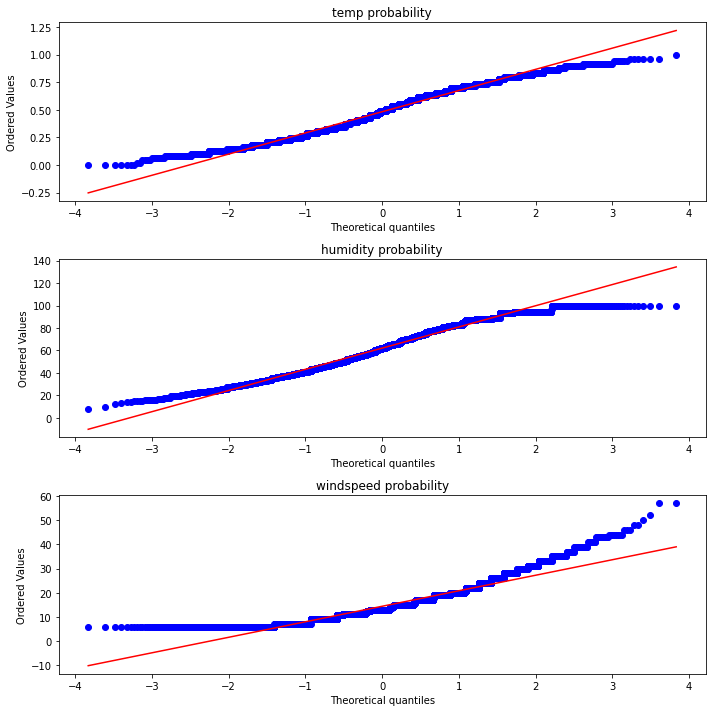

In [65]:
f = plt.figure(figsize=(10, 10))
ax1 = f.add_subplot(3, 1, 1)
res = stats.probplot(df_n['temp'], plot=plt)
ax1.set_title('temp probability')

ax2 = f.add_subplot(3, 1, 2)
res = stats.probplot(df_n['humidity'], plot=plt)
ax2.set_title('humidity probability')

ax3 = f.add_subplot(3, 1, 3)
res = stats.probplot(df_n['windspeed'], plot=plt)
ax3.set_title('windspeed probability')

plt.tight_layout()

* Q-Q plot 확인결과 대체로 세 데이터 모두 거의 유사하지만 windspeed 데이터는 약간 아쉬운 모습을 보여 로그 스케일링 하기로 결정.

In [66]:
df_n['log_windspeed'] = np.log1p(df_n['windspeed'])

* 로그 스케일링 후 Q-Q plot 확인

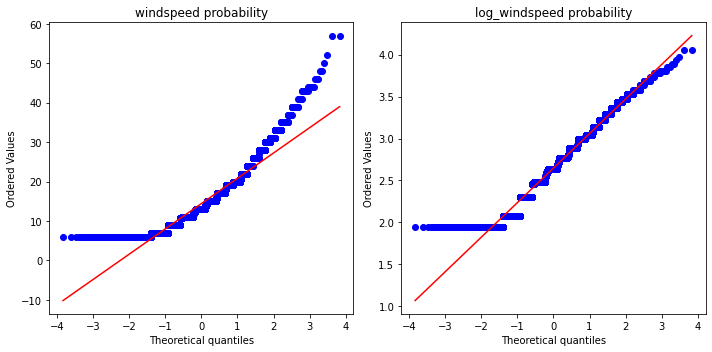

In [67]:
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(1, 2, 1)
res = stats.probplot(df_n['windspeed'], plot=plt)
ax1.set_title('windspeed probability')

ax2 = f.add_subplot(1, 2, 2)
res = stats.probplot(df_n['log_windspeed'], plot=plt)
ax2.set_title('log_windspeed probability')

plt.tight_layout()

* <span style = 'color : red'>**로그 스케일링 후 상당히 정규분포를 잘띄는 모습을 보임.**</span>

<hr/>

#### **데이터 예측 준비**

In [68]:
df_n.head()

,datetime,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,hour,log_count,log_casual,log_registered,log_windspeed
0,2011-01-01 00:00:00,0,1,0.224490,81.0,10.759666,3,13,16,2011,1,0,2.833213,1.386294,2.639057,2.464676
1,2011-01-01 01:00:00,0,1,0.204082,80.0,10.759666,8,32,40,2011,1,1,3.713572,2.197225,3.496508,2.464676
2,2011-01-01 02:00:00,0,1,0.204082,80.0,10.759666,5,27,32,2011,1,2,3.496508,1.791759,3.332205,2.464676
3,2011-01-01 03:00:00,0,1,0.224490,75.0,11.029600,3,10,13,2011,1,3,2.639057,1.386294,2.397895,2.487370
4,2011-01-01 04:00:00,0,1,0.224490,75.0,11.029600,0,1,1,2011,1,4,0.693147,0.000000,0.693147,2.487370


1. **필요없는 컬럼 삭제**
    * datetime 타입의 컬럼은 회귀모델에서는 사용하지 못하기 때문에 datetime 컬럼 삭제
    <br><br>
    * log 스케일링을 하기 전의 데이터를 삭제 (count, casual, registered, windspeed)
    <br><br>
    * count 컬럼은 casual 과 registered의 컬럼을 합쳐 구할 예정이기 때문에 삭제

In [69]:
df_n.drop(['datetime', 'count', 'casual', 'windspeed', 'registered', 'log_count'], axis=1, inplace=True)

2. **훈련 데이터셋 생성**

In [70]:
# casual 타겟변수 훈련 데이터
cy_train = pd.DataFrame(df_n['log_casual'], columns=['log_casual'])
# registered 타겟변수 훈련 데이터
ry_train = pd.DataFrame(df_n['log_registered'], columns=['log_registered'])

In [71]:
X_train = df_n.drop(['log_casual', 'log_registered'], axis=1)

3. **그리드 서치 진행**
    * 풍속 습도와 마찬가지로 아다부스트 랜덤포레스트 그래디언트 부스팅 사용
    <br><br>
    * casual과 registered 두 데이터에 대해 확인해야 하므로 2번씩 진행

* 아다부스트 예측 그리드서치

1. casual 예측

In [72]:
cada_model = AdaBoostRegressor()

cada_param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.4, 0.5, 0.6]
}

cada_gsc = GridSearchCV(cada_model, param_grid=cada_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cada_gsc.fit(X_train, cy_train.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.5, 0.6],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [73]:
print('베스트 하이퍼 파라미터: {0}'.format(cada_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * cada_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.4, 'n_estimators': 200}
베스트 하이퍼 파라미터 일 때 rmse: 0.78


* registered 예측

In [74]:
rada_model = AdaBoostRegressor()

rada_param = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.5, 0.6]
}

rada_gsc = GridSearchCV(rada_model, param_grid=rada_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rada_gsc.fit(X_train, ry_train.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.6],
                         'n_estimators': [300, 350, 400]},
             scoring='neg_mean_squared_error')

In [75]:
print('베스트 하이퍼 파라미터: {0}'.format(rada_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * rada_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.5, 'n_estimators': 350}
베스트 하이퍼 파라미터 일 때 rmse: 0.69


* 랜덤 포레스트 예측 그리드 서치

1. casual 예측

In [76]:
crf_model = RandomForestRegressor()

crf_param = {
    'max_depth' : [7, 8], 
    'n_estimators': [100, 200, 300]
}

crf_gsc = GridSearchCV(crf_model, param_grid=crf_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
crf_gsc.fit(X_train, cy_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8], 'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [77]:
print('베스트 하이퍼 파라미터: {0}'.format(crf_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * crf_gsc.best_score_)))

베스트 하이퍼 파라미터: {'max_depth': 8, 'n_estimators': 200}
베스트 하이퍼 파라미터 일 때 rmse: 0.62


2. registered 예측

In [78]:
rrf_model = RandomForestRegressor()

rrf_param = {
    'max_depth' : [9, 10], 
    'n_estimators': [200, 250]
}

rrf_gsc = GridSearchCV(rrf_model, param_grid=rrf_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rrf_gsc.fit(X_train, ry_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [9, 10], 'n_estimators': [200, 250]},
             scoring='neg_mean_squared_error')

In [79]:
print('베스트 하이퍼 파라미터: {0}'.format(rrf_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * rrf_gsc.best_score_)))

베스트 하이퍼 파라미터: {'max_depth': 10, 'n_estimators': 250}
베스트 하이퍼 파라미터 일 때 rmse: 0.49


* 그래디언트 부스팅 예측 그리드 서치

1. casual 예측

In [80]:
cgb_model = GradientBoostingRegressor()

cgb_param = [{
   'n_estimators': [100, 200, 300],
   'max_depth': [4, 5],
   'learning_rate': [0.1]
}]

cgb_gsc = GridSearchCV(cgb_model, param_grid=cgb_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cgb_gsc.fit(X_train, cy_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1], 'max_depth': [4, 5],
                          'n_estimators': [100, 200, 300]}],
             scoring='neg_mean_squared_error')

In [81]:
print('베스트 하이퍼 파라미터: {0}'.format(cgb_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * cgb_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
베스트 하이퍼 파라미터 일 때 rmse: 0.57


2. registered 예측

In [82]:
rgb_model = GradientBoostingRegressor()

rgb_param = [{
   'n_estimators': [200],
   'max_depth': [6],
   'learning_rate': [0.04, 0.05, 0.06]
}]

rgb_gsc = GridSearchCV(rgb_model, param_grid=rgb_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rgb_gsc.fit(X_train, ry_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.04, 0.05, 0.06], 'max_depth': [6],
                          'n_estimators': [200]}],
             scoring='neg_mean_squared_error')

In [83]:
print('베스트 하이퍼 파라미터: {0}'.format(rgb_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * rgb_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}
베스트 하이퍼 파라미터 일 때 rmse: 0.43


* <span style = 'color : RED'>**casual 과 registered 모두 그래디언트 부스팅에서 가장 좋은 성능을 보였음.**</span>

* casual learning_rate = 0.1, max_depth = 4, n_estimators = 200
* registered learning_rate = 0.05, max_depth = 6, n_estimators = 200

#### 그래디언트 부스팅 모델 선정

<hr/>

#### 예측해야할 데이터 만들기

* 예측 데이터 셋팅

In [84]:
TEST_FILE_PATH = 'data/test.csv'
test_df = pd.read_csv(TEST_FILE_PATH, parse_dates=['datetime'])

In [85]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [86]:
X_train.head()

,workingday,weather,temp,humidity,year,month,hour,log_windspeed
0,0,1,0.224490,81.0,2011,1,0,2.464676
1,0,1,0.204082,80.0,2011,1,1,2.464676
2,0,1,0.204082,80.0,2011,1,2,2.464676
3,0,1,0.224490,75.0,2011,1,3,2.487370
4,0,1,0.224490,75.0,2011,1,4,2.487370


* 테스트 데이터의 컬럼을 맞추어 주는 작업 실행

In [87]:
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['hour'] = test_df['datetime'].dt.hour

* 명절과 휴일 컬럼을 합쳐주었으니 테스트 데이터에서도 합침

In [88]:
tholi_index = list(test_df[test_df['holiday']==1].index)

for i in range(len(tholi_index)):
    test_df.loc[tholi_index[i], 'workingday'] = 2

test_df.drop('holiday', axis=1, inplace=True)

In [89]:
test_df[test_df['workingday']==2]

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
280,2011-02-21 00:00:00,1,2,2,13.94,15.150,42,22.0028,2011,2,0
281,2011-02-21 01:00:00,1,2,2,13.94,15.150,42,22.0028,2011,2,1
282,2011-02-21 02:00:00,1,2,2,13.94,15.150,42,22.0028,2011,2,2
283,2011-02-21 03:00:00,1,2,2,13.94,15.150,42,19.9995,2011,2,3
284,2011-02-21 04:00:00,1,2,1,13.12,15.910,45,11.0014,2011,2,4
...,...,...,...,...,...,...,...,...,...,...,...
6344,2012-12-25 19:00:00,1,2,2,13.12,15.150,66,15.0013,2012,12,19
6345,2012-12-25 20:00:00,1,2,2,13.12,15.150,66,19.0012,2012,12,20
6346,2012-12-25 21:00:00,1,2,2,12.30,14.395,65,12.9980,2012,12,21
6347,2012-12-25 22:00:00,1,2,2,12.30,15.150,70,11.0014,2012,12,22


* 다중 공선성을 보여 삭제해주었던 계절과 체감온도 데이터 삭제

In [90]:
test_df = MMscaler(test_df, ['temp', 'atemp'])

In [91]:
test_df.drop(['season', 'atemp'], axis=1, inplace=True)

test_df.head()

,datetime,workingday,weather,temp,humidity,windspeed,year,month,hour
0,2011-01-20 00:00:00,1,1,0.25,56,26.0027,2011,1,0
1,2011-01-20 01:00:00,1,1,0.25,56,0.0000,2011,1,1
2,2011-01-20 02:00:00,1,1,0.25,56,0.0000,2011,1,2
3,2011-01-20 03:00:00,1,1,0.25,56,11.0014,2011,1,3
4,2011-01-20 04:00:00,1,1,0.25,56,11.0014,2011,1,4


* 회귀 분석에서 쓰이지 않는 datetime 타입의 컬럼 또한 삭제

In [92]:
test_df.drop('datetime', axis=1, inplace=True)

2. 테스트 데이터 feature scaling

*  습도의 0값 확인
    * 존재하지 않음.

In [93]:
test_df[test_df['humidity']==0]

,workingday,weather,temp,humidity,windspeed,year,month,hour


* 풍속의 0값 확인
    * <span style = 'color : red'>**다수 존재**</span>

In [94]:
test_df[test_df['windspeed']==0]

,workingday,weather,temp,humidity,windspeed,year,month,hour
1,1,1,0.250000,56,0.0,2011,1,1
2,1,1,0.250000,56,0.0,2011,1,2
12,1,2,0.291667,42,0.0,2011,1,12
60,0,1,0.062500,35,0.0,2011,1,13
62,0,1,0.104167,28,0.0,2011,1,15
...,...,...,...,...,...,...,...,...
6433,0,3,0.187500,100,0.0,2012,12,12
6434,0,3,0.187500,100,0.0,2012,12,13
6436,0,2,0.229167,87,0.0,2012,12,15
6444,0,2,0.250000,60,0.0,2012,12,23


* **풍속 예측 그리드 서치**

* **데이터 준비**

In [95]:
tw_zeros = test_df[test_df['windspeed']==0]
tw_X = test_df.drop(tw_zeros.index, axis=0)
tw_y = pd.DataFrame(tw_X['windspeed'], columns=['windspeed'])
tw_X = tw_X.drop(['workingday', 'windspeed'], axis=1)

In [96]:
twpre_X = tw_zeros.drop('windspeed', axis=1)

In [97]:
twpre_X.drop('workingday', axis=1, inplace=True)

* **그리드 서치 진행**

1. **아다 부스트**

In [98]:
twada_model = AdaBoostRegressor()

twada_param = {
    'n_estimators': [10, 20, 300],
    'learning_rate': [0.01, 0.1, 0.3]
}

twada_gsc = GridSearchCV(twada_model, param_grid=twada_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
twada_gsc.fit(tw_X, tw_y.values.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'n_estimators': [10, 20, 300]},
             scoring='neg_mean_squared_error')

In [99]:
print('베스트 하이퍼 파라미터: {0}'.format(twada_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * twada_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.3, 'n_estimators': 10}
베스트 하이퍼 파라미터 일 때 rmse: 6.84


2. **랜덤 포레스트**

In [100]:
twrf_model = RandomForestRegressor()

twrf_param = {
    'max_depth' : [4], 
    'n_estimators': [150, 151, 152]
}

twrf_gsc = GridSearchCV(twrf_model, param_grid=twrf_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
twrf_gsc.fit(tw_X, tw_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4], 'n_estimators': [150, 151, 152]},
             scoring='neg_mean_squared_error')

In [101]:
print('베스트 하이퍼 파라미터: {0}'.format(twrf_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * twrf_gsc.best_score_)))

베스트 하이퍼 파라미터: {'max_depth': 4, 'n_estimators': 150}
베스트 하이퍼 파라미터 일 때 rmse: 6.81


3. **그래디언트 부스팅**

In [102]:
twgb_model = GradientBoostingRegressor()

twgb_param = [{
   'n_estimators': [49, 50, 51],
   'max_depth': [2, 3, 4],
   'learning_rate': [0.01, 0.1, 0.3]
}]

twgb_gsc = GridSearchCV(twgb_model, param_grid=twgb_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
twgb_gsc.fit(tw_X, tw_y.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1, 0.3],
                          'max_depth': [2, 3, 4],
                          'n_estimators': [49, 50, 51]}],
             scoring='neg_mean_squared_error')

In [103]:
print('베스트 하이퍼 파라미터: {0}'.format(twgb_gsc.best_params_))
print('베스트 하이퍼 파라미터 일 때 rmse: {0:.2f}'.format(np.sqrt(-1 * twgb_gsc.best_score_)))

베스트 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
베스트 하이퍼 파라미터 일 때 rmse: 6.73


* learning_rate = 0.1, max_depth = 2, n_esrimators=50 일 때 그래디언트 부스팅 모델에서 가장 좋은 성능을 보여 그래디언트 부스팅 모델 채택

In [104]:
twbest_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 2, n_estimators = 50)
twbest_model.fit(tw_X, tw_y.values.ravel())

twpre_y = twbest_model.predict(twpre_X)

In [105]:
twpindex_y = list(tw_zeros.index)

for i in range(len(twpindex_y)):
    test_df.loc[twpindex_y[i], 'windspeed'] = twpre_y[i]

In [106]:
test_df['log_windspeed'] = np.log1p(test_df['windspeed'])
test_df.drop('windspeed', axis=1, inplace=True)

In [107]:
X_train.head()

,workingday,weather,temp,humidity,year,month,hour,log_windspeed
0,0,1,0.224490,81.0,2011,1,0,2.464676
1,0,1,0.204082,80.0,2011,1,1,2.464676
2,0,1,0.204082,80.0,2011,1,2,2.464676
3,0,1,0.224490,75.0,2011,1,3,2.487370
4,0,1,0.224490,75.0,2011,1,4,2.487370


In [108]:
test_df.head()

,workingday,weather,temp,humidity,year,month,hour,log_windspeed
0,1,1,0.25,56,2011,1,0,3.295937
1,1,1,0.25,56,2011,1,1,2.808761
2,1,1,0.25,56,2011,1,2,2.808761
3,1,1,0.25,56,2011,1,3,2.485023
4,1,1,0.25,56,2011,1,4,2.485023


* 예측 데이터셋과 훈련 데이터 셋의 feature을 모두 맞추어 주었음.

<he/>

### 대여량 데이터 예측

* 선정되었던 모델은 그래디언트 부스팅 모델
    * casual 예측 파라미터 : learning_rate = 0.1, max_depth = 4, n_estimators = 200
    * registered 예측 파라미터 : learning_rate = 0.05, max_depth = 6, n_estimators = 200

In [109]:
cmain_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 200)
cmain_model.fit(X_train, cy_train)

plogcasual = cmain_model.predict(test_df)

In [110]:
rmain_model = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 6, n_estimators = 200)
rmain_model.fit(X_train, ry_train)

plogregistered = rmain_model.predict(test_df)

* 로그 스케일을 취했던 값이므로 exp 함수로 제곱
* 기본 예측 데이터 외에도 각각 버림, 반올림한 값의 정확도도 궁금해서 데이터를 나누었음.

In [111]:
pcasual = np.expm1(plogcasual)
rpcasual = np.round(pcasual)
tpcasual = np.trunc(pcasual)

pregistered = np.expm1(plogregistered)
rpregistered = np.round(pcasual)
tpregistered = np.trunc(pregistered)

pcount = pcasual + pregistered
rpcount = rpcasual + rpregistered
tpcount = tpcasual + tpregistered

* 예측값 제출을 위해 기본값 반올림 버림 데이터를 나누어서 submission 파일에 저장

In [113]:
SUB_FILE_PATH = 'data/sampleSubmission.csv'
sub = pd.read_csv(SUB_FILE_PATH)
tpsub = pd.read_csv(SUB_FILE_PATH)
rpsub = pd.read_csv(SUB_FILE_PATH)

In [114]:
sub['count'] = pcount

In [115]:
rpsub['count'] = rpcount

In [116]:
tpsub['count'] = tpcount

In [117]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,8.348373
1,2011-01-20 01:00:00,4.258755
2,2011-01-20 02:00:00,2.507060
3,2011-01-20 03:00:00,1.478175
4,2011-01-20 04:00:00,1.487918


In [118]:
sub.to_csv('20220407_mhAhnv0.14_submission.csv', index=False)

In [119]:
rpsub.to_csv('20220407_mhAhnv0.14_round_submission.csv', index=False)

In [120]:
tpsub.to_csv('20220407_mhAhnv0.14_trunc_submission.csv', index=False)

<hr/>

### **예측 결과**

* 첫제출 점수
<br><br>
![첫제출점수](png/첫제출.png)
![첫제출순위](png/첫제출등수.png)
<br><br>
* 위에서부터 버림, 반올림, 노말 데이터임.
* 버림과 반올림은 악효과를 끼쳤음.
<br><br>
![점수](png/결과.png)
<br><br>
* 가장 점수가 좋은 노말 데이터의 등수
<br><br>
![순위](png/예측순위.png)

* 2609등에서 843등으로 대략 1600등 정도 상승하였음

<hr/>

### **다음 목표**

* XGboost (Extreme Gradient Boost) > 그래디언트 부스팅 모델의 강화버전
* LGBM (Light Gradient Boost Machine) > 그래디언트 부스터 보다 가볍고 빠른 모델
* 등 새로문 모델을 학습하고 적용시켜볼 예정
+ 데이터 전처리 개선점 Search